In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot,plot1d,plot2d,Interval
import re
from coffea import hist
import coffea,uproot3, numpy

In [2]:
from xs_scaler import *

In [3]:
try1 = load('hists_QCD_QCD_Pt_sample.coffea')

In [4]:
try1

{'pt': <Hist (dataset,flav,pt) instance at 0x7f58f0070810>,
 'eta': <Hist (dataset,flav,eta) instance at 0x7f5889aa9c50>,
 'phi': <Hist (dataset,flav,phi) instance at 0x7f5889aad650>,
 'mass': <Hist (dataset,flav,mass) instance at 0x7f5889ab1090>,
 'btagCMVA': <Hist (dataset,flav,btagCMVA) instance at 0x7f5889ab1b10>,
 'btagCSVV2': <Hist (dataset,flav,btagCSVV2) instance at 0x7f5889a36490>,
 'btagDeepB': <Hist (dataset,flav,btagDeepB) instance at 0x7f5889a36e50>,
 'btagDeepC': <Hist (dataset,flav,btagDeepC) instance at 0x7f5889a3b850>,
 'btagDeepFlavB': <Hist (dataset,flav,btagDeepFlavB) instance at 0x7f5889a40250>,
 'btagDeepFlavC': <Hist (dataset,flav,btagDeepFlavC) instance at 0x7f5889a40c10>,
 'DeepCSV_trackDecayLenVal_0': <Hist (dataset,flav,DeepCSV_trackDecayLenVal_0) instance at 0x7f5889a435d0>,
 'DeepCSV_trackDecayLenVal_1': <Hist (dataset,flav,DeepCSV_trackDecayLenVal_1) instance at 0x7f5889a43f50>,
 'DeepCSV_trackDecayLenVal_2': <Hist (dataset,flav,DeepCSV_trackDecayLenVal_2)

In [5]:
try2 = load('hists_QCD_QCD_Pt_sample_noPU.coffea')

In [6]:
try2

{'pt': <Hist (dataset,flav,pt) instance at 0x7f588998cc90>,
 'eta': <Hist (dataset,flav,eta) instance at 0x7f588999d590>,
 'phi': <Hist (dataset,flav,phi) instance at 0x7f588999ded0>,
 'mass': <Hist (dataset,flav,mass) instance at 0x7f58899a1850>,
 'btagCMVA': <Hist (dataset,flav,btagCMVA) instance at 0x7f58899a51d0>,
 'btagCSVV2': <Hist (dataset,flav,btagCSVV2) instance at 0x7f58899a5ad0>,
 'btagDeepB': <Hist (dataset,flav,btagDeepB) instance at 0x7f58899a9410>,
 'btagDeepC': <Hist (dataset,flav,btagDeepC) instance at 0x7f58899a9d10>,
 'btagDeepFlavB': <Hist (dataset,flav,btagDeepFlavB) instance at 0x7f58899ad650>,
 'btagDeepFlavC': <Hist (dataset,flav,btagDeepFlavC) instance at 0x7f58899b14d0>,
 'njet': <Hist (dataset,njet) instance at 0x7f58899b36d0>,
 'nbjet_t': <Hist (dataset,nbjet_t) instance at 0x7f58899355d0>,
 'nbjet_m': <Hist (dataset,nbjet_m) instance at 0x7f5889a9f6d0>,
 'nbjet_l': <Hist (dataset,nbjet_l) instance at 0x7f588993ac10>,
 'nel': <Hist (dataset,nel) instance at 

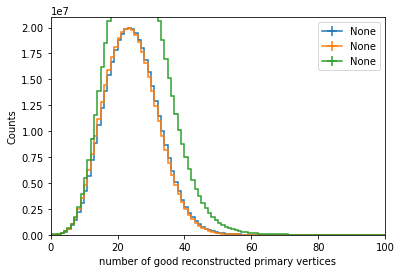

In [7]:
notdata=re.compile('(?!Data)')
datas=re.compile('(?=Data)')

h_nTrueInt_weighted=try1['Pileup_nTrueInt']
h_nTrueInt_unweighted = try2['Pileup_nTrueInt']

h_MC_npvsGood_weighted = try1['PV_npvsGood'][notdata]
h_MC_npvsGood_unweighted = try2['PV_npvsGood'][notdata]
h_data_npvsGood = try2['PV_npvsGood'][datas]

a = plot1d(h_MC_npvsGood_weighted.sum('dataset'))
b = plot1d(h_MC_npvsGood_unweighted.sum('dataset'))
c = plot1d(h_data_npvsGood.sum('dataset'))

In [8]:
#fout = uproot3.create('check.root')
#fout['MC_npvsGood_weighted'] = coffea.hist.export1d(h_MC_npvsGood_weighted.sum('dataset'))
#fout['MC_npvsGood_unweighted'] = coffea.hist.export1d(h_MC_npvsGood_unweighted.sum('dataset'))
#fout['data_npvsGood'] = coffea.hist.export1d(h_data_npvsGood.sum('dataset'))
#fout.close()

<AxesSubplot:xlabel='Leading jet $p_{T}$ [GeV]', ylabel='Counts'>

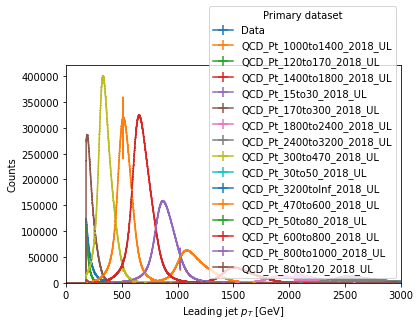

In [9]:
plot1d(try1['ljpt'].sum('flav'))

In [ ]:
x_sec = [1831718000.0,139803000.0,19222500.0,2758420.0,469797.0,117989.0,7820.25,645.528,187.109,32.3486,7.488e+00,6.485e-01,8.730e-02,5.248e-03,1.352e-04]
nevents= [19991000.0,19706000.0,19493000.0,29688373.506835938,30225362.55126953,29676000.0,57910008.93261719,52448170.470947266,67508001.16503906,37160000.0,19730000.0,10670000.0,5491000.0,2988000.0,1000000.0]

scales=[]
for i in range(15):
    scales.append(x_sec[i]/nevents[i])
scales[14]

In [ ]:
hist_1 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_15to30_2018_UL')
hist_1.scale(scales[0])
hist_2 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_30to50_2018_UL')
hist_2.scale(scales[1])
hist_3 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_50to80_2018_UL')
hist_3.scale(scales[2])
hist_4 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_80to120_2018_UL')
hist_4.scale(scales[3])
hist_5 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_120to170_2018_UL')
hist_5.scale(scales[4])
hist_6 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_170to300_2018_UL')
hist_6.scale(scales[5])
hist_7 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_300to470_2018_UL')
hist_7.scale(scales[6])
hist_8 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_470to600_2018_UL')
hist_8.scale(scales[7])
hist_9 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_600to800_2018_UL')
hist_9.scale(scales[8])
hist_10 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_800to1000_2018_UL')
hist_10.scale(scales[9])
hist_11 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1000to1400_2018_UL')
hist_11.scale(scales[10])
hist_12 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1400to1800_2018_UL')
hist_12.scale(scales[11])
hist_13 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_1800to2400_2018_UL')
hist_13.scale(scales[12])
hist_14 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_2400to3200_2018_UL')
hist_14.scale(scales[13])
hist_15 =try1['ljpt'].sum('flav').integrate('dataset', 'QCD_Pt_3200toInf_2018_UL')
hist_15.scale(scales[14])


In [ ]:
histo = hist_1
histo = histo.add(hist_2)
histo = histo.add(hist_3)
histo = histo.add(hist_4)
histo = histo.add(hist_5)
histo = histo.add(hist_6)
histo = histo.add(hist_7)
histo = histo.add(hist_8)
histo = histo.add(hist_9)
histo = histo.add(hist_10)
histo = histo.add(hist_11)
histo = histo.add(hist_12)
histo = histo.add(hist_13)
histo = histo.add(hist_14)
histo = histo.add(hist_15)

a = plot1d(histo)
a.set_ylim(0.0001)
#a.set_xlim(0., 2000.)
a.set_yscale('log')

In [ ]:
read_xs('xsection-QCD.json')

In [ ]:
events = try1['sumw']
events

In [ ]:
def read_xs(file):
    import json

    f = open(file)
    data = json.load(f)
    xs_dict={}
    for obj in data:
        xs_dict[obj['process_name']]=float(obj['cross_section'])
    return xs_dict

In [ ]:
read_xs('xsection-QCD.json')

In [ ]:
def scale_xs(hist,lumi,events,):
    xs_dict = read_xs('xsection-QCD.json')
    scales={}
    for key in events:
        if type(key) != str or key=="Data": continue
        scales[key]=xs_dict[key]*lumi/events[key]
        print(scales[key])
    hist.scale(scales, axis="dataset")
    return hist

In [ ]:
for key in events:
    if type(key) != str or key=="Data": continue
    print (events[key])

In [ ]:
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']

In [ ]:
events = try1['sumw']
ptetas=['ljpt']
datas=re.compile('(?=Data)')
notdata=re.compile('(?!Data)')

In [ ]:
hlj=try1['pt']
hlj=scale_xs(hlj,59.832045316,events) 
hlj_nodatacopy=hlj[notdata]

In [ ]:
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
plot1d(hlj_nodatacopy.sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)

rax=plot.plotratio(
                                        #num=hlj[datas].sum("dataset").sum("flav").rebin(name,5),
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        #denom=hlj_nodatacopy.sum("dataset").sum("flav").rebin(name,5),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

ax.set_ylabel("Events/1",fontsize=15)
ax.set_yscale('log')
ax.set_ylim(1,5000000)

rax.set_ylabel('Data/MC',fontsize=15)
ax.set_xlabel(None)
rax.set_xlabel(r"jet pT",fontsize=15)
rax.set_ylim(0.,2.0)
    

In [ ]:

for name in ptetas:
    hlj=try1[name]
    hlj=scale_xs(hlj,59.832045316,events) 
    
    hlj_nodatacopy=hlj[notdata]
    
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    plot1d(hlj_nodatacopy.sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
    plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)
    

    rax=plot.plotratio(
                                        #num=hlj[datas].sum("dataset").sum("flav").rebin(name,5),
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        #denom=hlj_nodatacopy.sum("dataset").sum("flav").rebin(name,5),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

    ax.set_ylabel("Events/1",fontsize=15)
    #ax.set_yscale('log')
    ax.set_ylim(0.0,1000000)
    ax.set_xlim(-3.0,3.0)
    rax.set_ylabel('Data/MC',fontsize=15)
    ax.set_xlabel(None)
    rax.set_xlabel(r"leading jet $eta$",fontsize=15)
    rax.set_ylim(0.,2.0)
    rax.set_xlim(-3.0,3.0)
    #rax.set_xlim(0.,10.)
    #rax.set_yscale('log')
    #plt.savefig(name+'.pdf')

In [ ]:
events = try1['sumw']
ptetas=['SV_pt']
#ptetas=['ntracks','SV_mass','SV_dlen','SV_dlenSig','SV_deltaR','SV_pt']
datas=re.compile('(?=Data)')
notdata=re.compile('(?!Data)')

In [ ]:
for name in ptetas:
    hlj=try1[name]
    hlj=scale_xs(hlj,1.,events) 
    norm = {}
    sumMCall = 0
    for key in hlj[notdata].sum(name).sum("flav").values().keys():
        newkey = str(key).replace('(','').replace(',)','').replace("'","")
    
        sumMCall += hlj[notdata].sum(name).sum("flav").values()[key]
        #norm[newkey] = hlj[datas].sum(name).sum("flav").values()[('Data',)] / hlj[notdata].sum(name).sum("flav").values()[key]
    norm = hlj[datas].sum(name).sum("flav").values()[('Data',)] / sumMCall
    #norm['sumMCall'] = hlj[datas].sum(name).sum("flav").values()[('Data',)] / hlj[notdata].sum(name).sum("flav").values()[key]
    print("Nevent MC",hlj[notdata].sum(name).sum("flav").values())
    print("Nevent data",hlj[datas].sum(name).sum("flav").values())
    print("norm",norm)
    
    hlj_nodatacopy=hlj[notdata]

    #hlj_nodatacopy.scale(norm['sumMCall'])
    hlj_nodatacopy.scale(norm)
    
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax=plot.plot1d(hlj_nodatacopy.sum("dataset").rebin(name,5),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
    plot.plot1d(hlj[datas].sum("dataset").sum("flav").rebin(name,5),error_opts=data_err_opts,ax=ax,density=False,clear=False)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)
    

    rax=plot.plotratio(
                                        num=hlj[datas].sum("dataset").sum("flav").rebin(name,5),
                                        #num=hlj[datas].sum("dataset").sum("flav"),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav").rebin(name,5),
                                        #denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

    ax.set_ylabel("Events/5 GeV",fontsize=15)
    ax.set_yscale('log')
    ax.set_ylim(1,30000000)
    ax.set_xlim(0.,200.)
    rax.set_ylabel('Data/MC',fontsize=15)
    ax.set_xlabel(None)
    rax.set_xlabel(r"SV $p_{T}$ [GeV]",fontsize=15)
    rax.set_ylim(0.0,2.)
    #rax.set_yscale('log')
    #plt.savefig(name+'.png')  
    

In [ ]:
events = try1['sumw']
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']
datas=re.compile('(?=Data)')
notdata=re.compile('(?!Data)')
hlj=try1['ljpt']
#hlj=scale_xs(hlj,events,1)
# norm = {}
#for key in hlj[notdata].sum('ljpt').sum("flav").values().keys():
#    newkey = str(key).replace('(','').replace(',)','').replace("'","")
#    norm[newkey] = hlj[datas].sum('ljpt').sum("flav").values()[('Data',)] / hlj[notdata].sum('ljpt').sum("flav").values()[key]
hlj_nodatacopy=hlj[notdata]
#hlj_nodatacopy.scale(norm,axis="dataset")
hlj_nodatacopy.scale(norm['sumMCall'])
# hlj_nodatacopy.scale(231.7836728873188)


fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax=plot.plot1d(hlj_nodatacopy.sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
plot.plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','udsg','data'],fontsize=13)

rax=plot.plotratio(
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        denom=hlj_nodatacopy.sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)
    

ax.set_ylabel("Events",fontsize=15)
#ax.set_yscale('log')
#ax.set_ylim(1,10000000)
rax.set_ylabel('Data/MC',fontsize=15)
ax.set_xlabel('ljpt')
rax.set_xlabel('ljpt',fontsize=15)
rax.set_ylim(0.0,2.0)
#rax.set_yscale('log')


In [ ]:
hlj[notdata]

In [ ]:
print(hlj_nodatacopy.sum("dataset").sum('flav').sum('ljpt').values()[()])
print(hlj[datas].sum("dataset").sum("flav").sum('ljpt').values()[()])
events
11400185.0/49184.59034662972

In [ ]:
#hlj[notdata].integrate('flav', Interval(0, 4))
# coffea.hist
#plot1d(hlj[notdata].integrate('flav', Interval(0, 4)), stack=True)
plot1d(hlj[notdata].integrate('flav'))

In [ ]:
Ntt = np.sum(hlj[notdata].sum('eta').sum("flav").values())
N = np.sum(hlj[datas].sum('eta').sum("flav").values())
Ntt = [i for i in Ntt.values()] # the zeroth column entry is the number of events defined as a float
N = [i for i in N.values()]
norm=N[0]/Ntt
norm = {'QCD_HT2000toInf': 4.56059025e+10,'QCD_HT1500to2000': 4.39239261e+09, 'QCD_HT1000to1500':6.86918614e+07,'QCD_HT500to700': 8.15042151e+06,
      'QCD_HT500to700': 6.15260878e+05,'QCD_HT300to500': 3.17703133e+04}


In [ ]:
norm = {}
for key in hlj[notdata].sum('eta').sum("flav").values().keys():
    newkey = str(key).replace('(','').replace(',)','').replace("'","")
    norm[newkey] = hlj[datas].sum('eta').sum("flav").values()[('Data',)] / hlj[notdata].sum('eta').sum("flav").values()[key]

norm

In [ ]:
plot1d(output_6['eta'])

In [ ]:
x_sec = [347700,32100,6831,1207,119.9,25.24]
nevents= [52778707,55152960,48158738,15446605,10938738,5320919]

scales=[]
for i in range(6):
    scales.append(x_sec[i]/nevents[i])
scales

In [ ]:
for key in events:
    

In [ ]:
plot1d(output_6['btagCMVA'])

In [ ]:
hist =output_1['ljpt'].integrate('dataset', 'QCD_HT')
#MC_hist = hist.copy() 
hist.scale(scales[0])
hist2 =output_2['ljpt'].integrate('dataset', 'QCD_HT')
hist2.scale(scales[1])
hist3 =output_3['ljpt'].integrate('dataset', 'QCD_HT')
hist3.scale(scales[2])
hist4 =output_4['ljpt'].integrate('dataset', 'QCD_HT')
hist4.scale(scales[3])
hist5 =output_5['ljpt'].integrate('dataset', 'QCD_HT')
hist5.scale(scales[4])
hist6 =output_6['ljpt'].integrate('dataset', 'QCD_HT')
hist6.scale(scales[5])

hist = (hist.add(hist2))
hist = (hist.add(hist3))
hist = (hist.add(hist4))
hist = (hist.add(hist5))
hist = (hist.add(hist6))

a = plot1d(hist)
a.set_ylim(1, None)
a.set_xlim(175, 2000)
a.set_yscale('log')

In [ ]:
#plot1d(output_1['ljpt'])
output = (output_1['ljpt'].integrate('dataset', 'QCD_HT').add(output_2['ljpt'].integrate('dataset', 'QCD_HT')))
plot1d(output)

In [ ]:
hist =output_1['ljpt'].integrate('dataset', 'QCD_HT')
#MC_hist = hist.copy() 
hist.scale(20)
hist2 =output_2['ljpt'].integrate('dataset', 'QCD_HT')
hist2.scale(20)
output3 = (hist.add(hist2))
plot1d(output3)

In [ ]:
ax = plot1d(output_1['ljpt'])
ax.set_ylim(1, 100)
ax.set_xlim(0, 200)
ax.set_yscale('log')


In [ ]:
plot1d(output_2['ljpt'].integrate('dataset', 'QCD_HT'))
events=output_1['sumw']
events

In [ ]:
weights = output_1['ljpt'].values()[('QCD_HT',)]
weights

for i in range(len(weights)):
    print(output_1['ljpt'].axis('ljpt').centers()[i], weights[i])

In [ ]:
output_1['ljpt'].axis('ljpt').centers()#*np.where(output['ljpt'].values()[('inclusive_QCD',)]==0, 0, 1)

In [ ]:
np.repeat(output_1['ljpt'].axis('ljpt').centers(), np.array(weights, dtype=int))

In [ ]:
import json
f = open('QCD_samples.json')
sample = json.load(f)
for i in sample['Data']:
    print(i)

In [ ]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}


In [4]:
import awkward as ak
a = ak.Array([0,0,0,1,2])
b =ak.Array([[],[],[],[10],[20,20]])
print(b)
c = ak.where(ak.count(b, axis=-1)==0, [[0]], b)
print(c)

[[], [], [], [10], [20, 20]]
[[0], [0], [0], [10], [20, 20]]


In [5]:
ak.count(b,axis=1)

<Array [0, 0, 0, 1, 2] type='5 * int64'>

In [6]:
print(ak.broadcast_arrays(a,b)[0])


[[], [], [], [1], [2, 2]]


In [7]:
d = ak.broadcast_arrays(a,c)[0]

In [8]:
print(d)


[[0], [0], [0], [1], [2, 2]]


In [9]:
print(ak.count(d, axis = -1))

[1, 1, 1, 1, 2]


In [10]:
ak.flatten(d)

<Array [0, 0, 0, 1, 2, 2] type='6 * int64'>

In [33]:
f = ak.Array([[None],[None],[None],[10],[20,20]])
f

<Array [[None], [None], ... [10], [20, 20]] type='5 * var * ?int64'>

In [34]:
ak.flatten(f)

<Array [None, None, None, 10, 20, 20] type='6 * ?int64'>

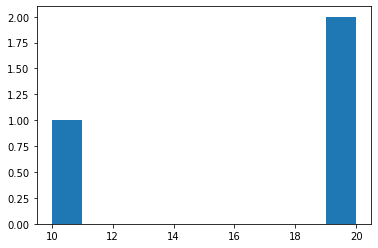

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# notice the semicolon, which prevents display of the return values
plt.hist(ak.flatten(f));

In [50]:
a = ak.Array([0,0,0,1,2])
b =ak.Array([[],[],[],[10],[20,20]])
print(b)
c = ak.where(ak.count(b, axis=1)==0, [[None]], b)
print(c)


[[], [], [], [10], [20, 20]]
[[None], [None], [None], [10], [20, 20]]
